In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Provided functions (we have to modify this)
def get_ksize(sigma):
    return int(((sigma - 0.8)/0.15) + 2.0)

def get_gaussian_blur(img, ksize=0, sigma=5):
    if ksize == 0:
        ksize = get_ksize(sigma)
    sep_k = cv2.getGaussianKernel(ksize, sigma)
    return cv2.filter2D(img, -1, np.outer(sep_k, sep_k))

def ssr(img, sigma):
    img = img.astype('float32') / 255  # Convert to float and normalize
    blurred = get_gaussian_blur(img, sigma=sigma)
    return np.log10(img + 1e-6) - np.log10(blurred + 1e-6)

# # New MSR function
# def msr(img, sigma_scales=[15, 80, 250]):
#     msr_img = np.zeros(img.shape)
#     for sigma in sigma_scales:
#         msr_img += ssr(img, sigma)
#     msr_img = msr_img / len(sigma_scales)
#     msr_img = cv2.normalize(msr_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#     return msr_img




In [20]:
# Load an image
image_path = '/home/eaguiraud/Documents/34269_computer_imaging_and_spectroscopy/low_light_enhancement/images/dark_img_1.png'  # Update this path
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB



In [21]:
# Apply SSR
sigma = 30  # Example sigma value, adjust based on your needs
ssr_img = ssr(img, sigma)

# Normalize SSR image for display
ssr_img_normalized = cv2.normalize(ssr_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


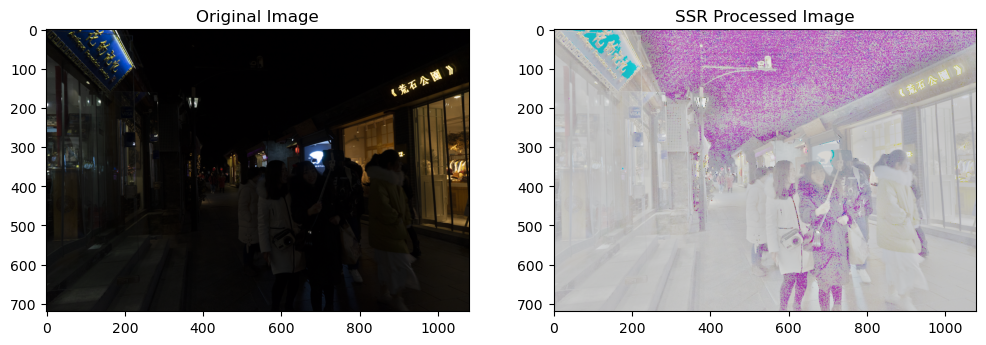

In [22]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(ssr_img_normalized)
plt.title('SSR Processed Image')

plt.show()

In [23]:
# # Apply MSR
# msr_img = msr(img)

# # Normalize MSR image for display
# msr_img_normalized = cv2.normalize(msr_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# # Plotting
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(img)
# plt.title('Original Image')

# plt.subplot(1, 2, 2)
# plt.imshow(msr_img_normalized)
# plt.title('MSR Processed Image')

# plt.show()

# # Plotting
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(ssr_img_normalized)
# plt.title('SSR Processed Image')

# plt.subplot(1, 2, 2)
# plt.imshow(msr_img_normalized)
# plt.title('MSR Processed Image')

# plt.show()
